<a href="https://colab.research.google.com/github/HaitaanshDixit/Research_Paper/blob/BLIP-2/BLIP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install transformers accelerate timm
# !pip install git+https://github.com/salesforce/BLIP.git

!pip install -q transformers accelerate timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.5 MB/s eta 0:00:00


In [2]:
import torch
#from transformers import Blip2Processor, Blip2ForConditionalGeneration
from transformers import AutoProcessor, LlavaForConditionalGeneration
from PIL import Image
from google.colab import files

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
# torch_dtype = torch.float16 if device == "cuda" else torch.float32

In [17]:
"""
processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-opt-2.7b",
    device_map="auto",
    torch_dtype=torch.float16
)


processor = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")
model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-flan-t5-xl",
    torch_dtype=torch.float16,
    device_map="auto"
)
"""

model_id = "llava-hf/llava-1.5-7b-hf"
processor = AutoProcessor.from_pretrained(model_id)
model = LlavaForConditionalGeneration.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    device_map="auto"
)

#model.to(device)
# model.to("cuda" if torch.cuda.is_available() else "cpu")

preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/128k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.81G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

Saving Screenshot 2025-06-12 155840.png to Screenshot 2025-06-12 155840.png


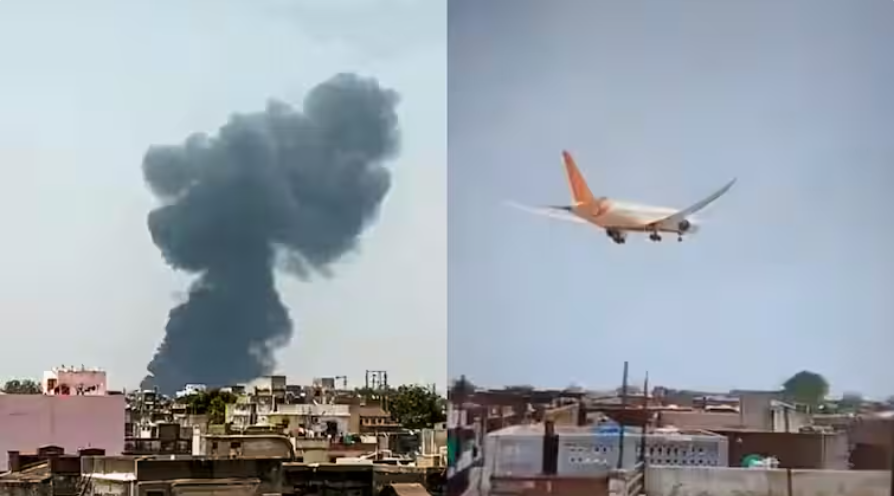

(894, 496)


In [5]:
# Upload image
uploaded = files.upload()

# Open the first uploaded image
image_path = list(uploaded.keys())[0]
image = Image.open(image_path).convert("RGB")
display(image)
print(image.size)

In [13]:
input_text = """अहमदाबाद हवाईअड्डे के पास मेघाणी नगर इलाके में आज दोपहर यह विमान गिरकर दुर्घटनाग्रस्त हो गया. इसमें 242 यात्री सवार थे. पुलिस ने यह जानकारी दी. अग्निशमन अधिकारी जयेश खड़िया ने बताया कि विमान के गिरने के बाद उसमें आग लग गई और दमकल गाड़ियों को आग बुझाने के लिए मौके पर भेजा गया है.
यह विमान लंदन जा रहा था. दुर्घटना में कई लोगों के हताहत होने की आशंका है. अहमदाबाद में एयर इंडिया विमान दुर्घटना स्थल पर बचाव और राहत कार्य जारी है. """

# instruction = f"दिए गए चित्र और विवरण को ध्यान से पढ़ें और उनका सारांश सरल हिंदी में दें:\n\n{input_text}"
instruction = (
    "दिए गए चित्र और विवरण को ध्यान से पढ़ें और उनका सारांश सरल हिंदी में अधिकतम 100 शब्दों में दें:\n\n"
)

prompt = instruction + input_text


In [18]:
inputs = processor(images=image, text=prompt, return_tensors="pt", truncation=True, max_length=1024).to(model.device)
inputs = {k: v.to(device) for k, v in inputs.items()}
#for k, v in inputs.items():
#    inputs[k] = v.to(device)

torch.cuda.empty_cache()

with torch.no_grad():
    generated_ids = model.generate(
        **inputs,
        decoder_start_token_id=model.config.decoder_start_token_id,  # MUST INCLUDE THIS
        max_new_tokens=100,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.9,
        #pad_token_id=tokenizer.eos_token_id
        early_stopping=True
    )

"""
generated_ids = model.generate(
    **inputs,
    decoder_start_token_id=model.config.decoder_start_token_id,  # <<< add this
    max_new_tokens=100,
    #num_beams=2,
    temperature=0.8,
    no_repeat_ngram_size=2,
    early_stopping=True,
)
"""

The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


'\ngenerated_ids = model.generate(\n    **inputs,\n    decoder_start_token_id=model.config.decoder_start_token_id,  # <<< add this\n    max_new_tokens=100,\n    #num_beams=2,\n    temperature=0.8,\n    no_repeat_ngram_size=2,\n    early_stopping=True,\n)\n'

In [20]:
summary = processor.tokenizer.decode(generated_ids[0], skip_special_tokens=True).strip()
#summary = processor.decode(generated_ids[0], skip_special_tokens=True).strip()

print("Generated Summary:\n", summary)

Generated Summary:
 MHeH...................................................................................................................................................................................................................................................................................................
